Project Target:
    1. Exploratory Data Analysis: 
        a. Use appropriate methods to visualize data, and provide more intuitive insight.
        b. Run A/B test to decide which variable shows significant level of difference in death/non-death groups.
    2. Apply different machine learning methods to build predictive models:
        a. Logistic Regression
        b. Random Forest
        c. Neural Network

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read the data
heart = pd.read_csv("heart.csv")

In [4]:
#Check missing values 
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


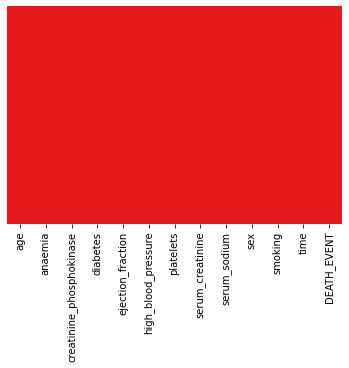

In [5]:
#This can be visualized using heatmap
#Check Null Value in Dataset
sns.heatmap(data = heart.isnull(),yticklabels=False,cmap = "Set1",cbar=False)

In [5]:
#get summary statistics for each column
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In this project, I decide to not remove outliers, for following reasons:
    1. The definition of outlier is partially based on the assumption of Gaussian Distribution, but so far there is no evidence showing ejection_fraction, CPK enzyme level (creatinine_phosphokinase), etc are following Gaussian Distribution.
    2. Some abnormal values are developed by the existed disease or health issue, which we can't ignore these factors when we are building the models. 

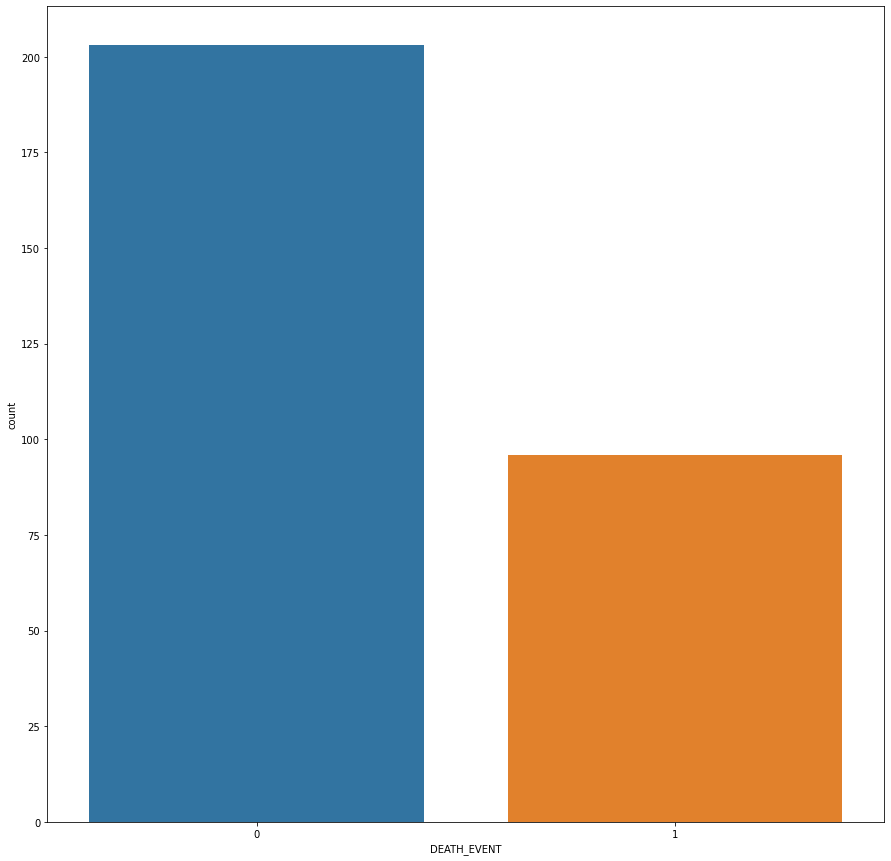

In [50]:
#Check each group size, avoid the high type-1/type-2 error led by uneven group size.
plt.figure(figsize=(15,15))
sns.countplot(x = "DEATH_EVENT",data = heart)

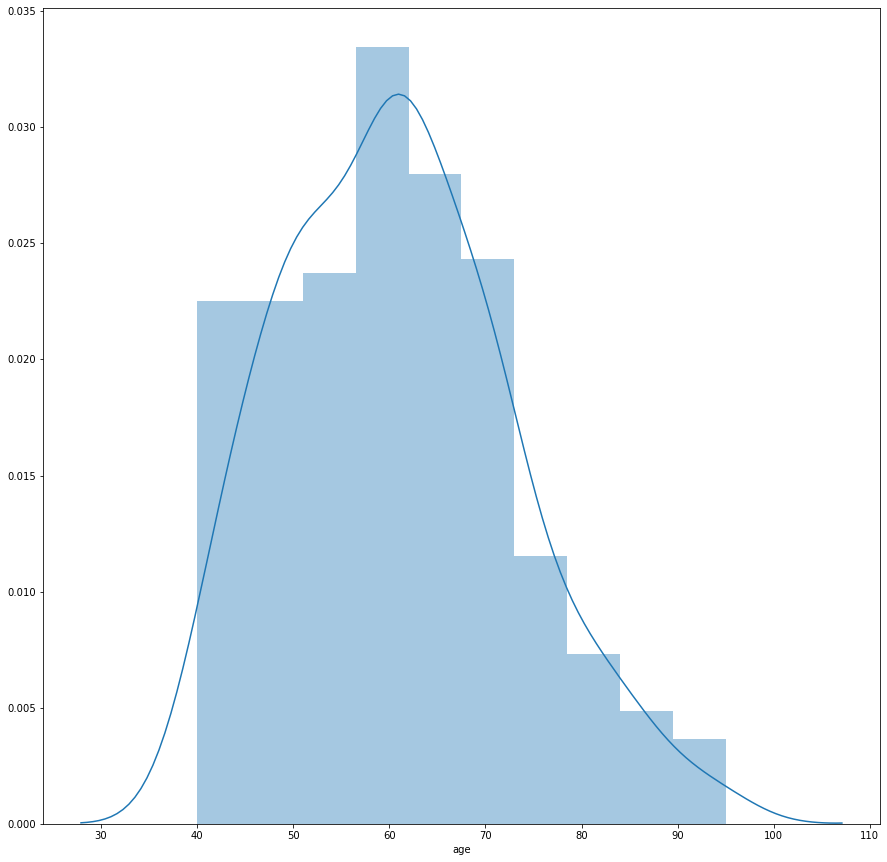

In [49]:
#check age distribution in data
plt.figure(figsize=(15,15))
sns.distplot(heart.age)

The age should follow a normal distribution in the population.In our data, the age is closed to a normal distribution. Based on this, we could conduct 2-sample t test with: \
$H_0$: $E(Age_{death=1}) = E(Age_{death=0})$ \
$H_1$: $E(Age_{death=1}) > E(Age_{death=0})$ 

In [8]:
death_group = heart[heart['DEATH_EVENT']==1]
nondeath_group = heart[heart['DEATH_EVENT']==0]
print('the shape of death group: {0}\nthe shape of non-death group: {1}'.format(death_group.shape,nondeath_group.shape))

the shape of death group: (96, 13)
the shape of non-death group: (203, 13)


In [13]:
import scipy

In [16]:
#Check if two groups are equal variance
print("Mean of age in death group: {0}, Variance of age in death group: {1}".format(death_group['age'].mean(),death_group['age'].var()))
print("Mean of age in non-death group: {0}, Variance of age in non-death group: {1}".format(nondeath_group['age'].mean(),nondeath_group['age'].var()))

Mean of age in death group: 65.21528125, Variance of age in death group: 174.62448075164468
Mean of age in non-death group: 58.76190640394089, Variance of age in non-death group: 113.1647084713947


In [14]:
test_value = scipy.stats.ttest_ind(death_group['age'],nondeath_group['age'],equal_var=False,)
test_value

Ttest_indResult(statistic=4.186210205663688, pvalue=4.735214517659265e-05)

Since we are conducting one-tailed test, the p-value should be $0.025$ instead of $0.05$, but the p-value is small enough, so we reject null hypothesis, meaning the mean age in death group is larger than the mean age in non-death group.

In [19]:
#we would like to check if some existed condition or disease will cause a different mortality rate.
dummy_var = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
for i in dummy_var:
    ratio_1 = death_group[i].sum()/death_group.shape[0]
    ratio_2 = nondeath_group[i].sum()/nondeath_group.shape[0]
    print(i,ratio_1,ratio_2)

anaemia 0.4791666666666667 0.4088669950738916
diabetes 0.4166666666666667 0.4187192118226601
high_blood_pressure 0.40625 0.3251231527093596
sex 0.6458333333333334 0.6502463054187192
smoking 0.3125 0.3251231527093596


Anaemia and high blood pressure show a relatively big difference in different groups. Based on this we can do a chi-square test to see if our conclusion is significant. So we will use the pooled ratio as our null hypothesis. The two chi-square tests are:\
$H_0$: patients in different groups have the same chance having anaemia                               
$H_1$: patients in death groups have the higher chance having anaemia              
$H_0$: patients in different groups have the same chance having high blood pressure                  
$H_1$: patients in death groups have the higher chance having high blood pressure

In [43]:
from scipy.stats import chi2

In [45]:
#Function to calculate chi-square statistics
def chi_sq_stat(var_name):
    n = heart.shape[0]
    n0 = nondeath_group.shape[0]
    n1 = death_group.shape[0]
    pooled_ratio = heart[var_name].sum()/n
    theo_1 = round(n1*pooled_ratio,0)
    theo_2 = round(n0*pooled_ratio,0)
    theo_3 = round(n1*(1-pooled_ratio),0)
    theo_4 = round(n0*(1-pooled_ratio),0)
    observe_1 = death_group[var_name].sum()
    observe_2 = nondeath_group[var_name].sum()
    observe_3 = n1 - observe_1
    observe_4 = n0 - observe_2
    T = np.array([theo_1,theo_2,theo_3,theo_4])
    O = np.array([observe_1,observe_2,observe_3,observe_4])
    D = np.sum(np.square(T-O)/T)
    pvalue = chi2.sf(D, df=1)
    return([D,pvalue])

In [48]:
test_anaemia = chi_sq_stat('anaemia')
test_high_blood = chi_sq_stat('high_blood_pressure')
print('The chi-square statistic for anaemia is {0}, and the p-value is {1}.'.format(test_anaemia[0],test_anaemia[1]))
print('The chi-square statistic for high blood pressure is {0}, and the p-value is {1}.'.format(test_high_blood[0],test_high_blood[1]))

The chi-square statistic for anaemia is 1.5657837655451654, and the p-value is 0.21082037116406618.
The chi-square statistic for high blood pressure is 1.6800265395489493, and the p-value is 0.19492092606957698.


We can see, even with obvious mean difference, it is still statistically insignificant. So we cannot say that patients in the death group have higher chance having either anaemia or high blood pressure.

In [ ]:
#per

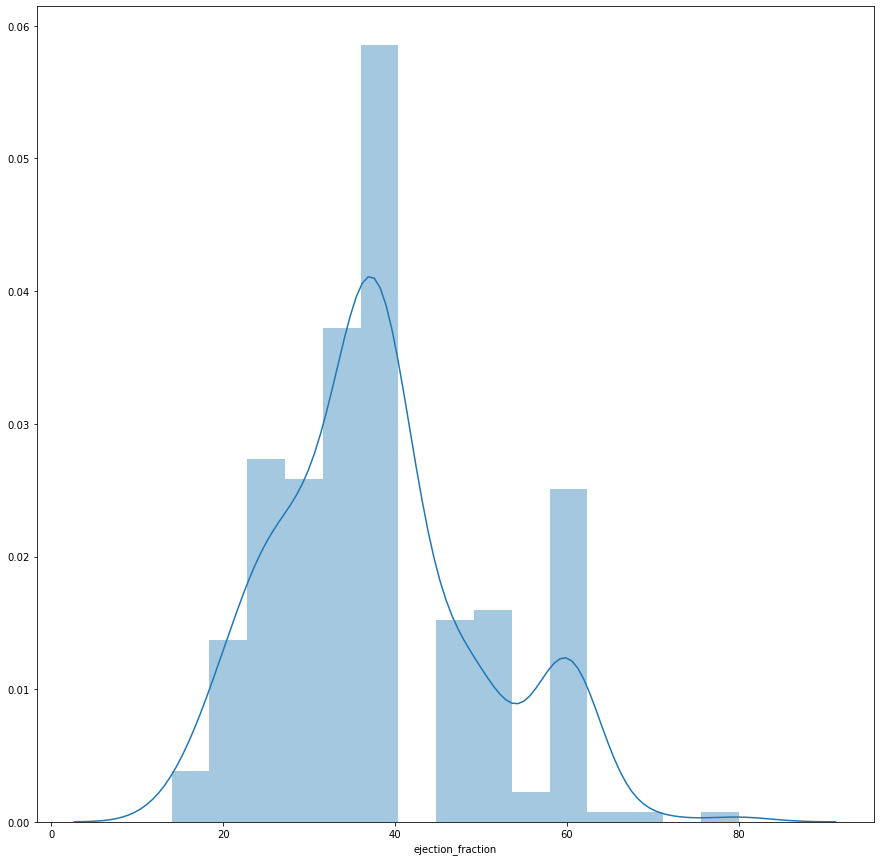

In [54]:
#Ejection fraction
plt.figure(figsize=(15,15))
sns.distplot(heart['ejection_fraction'])

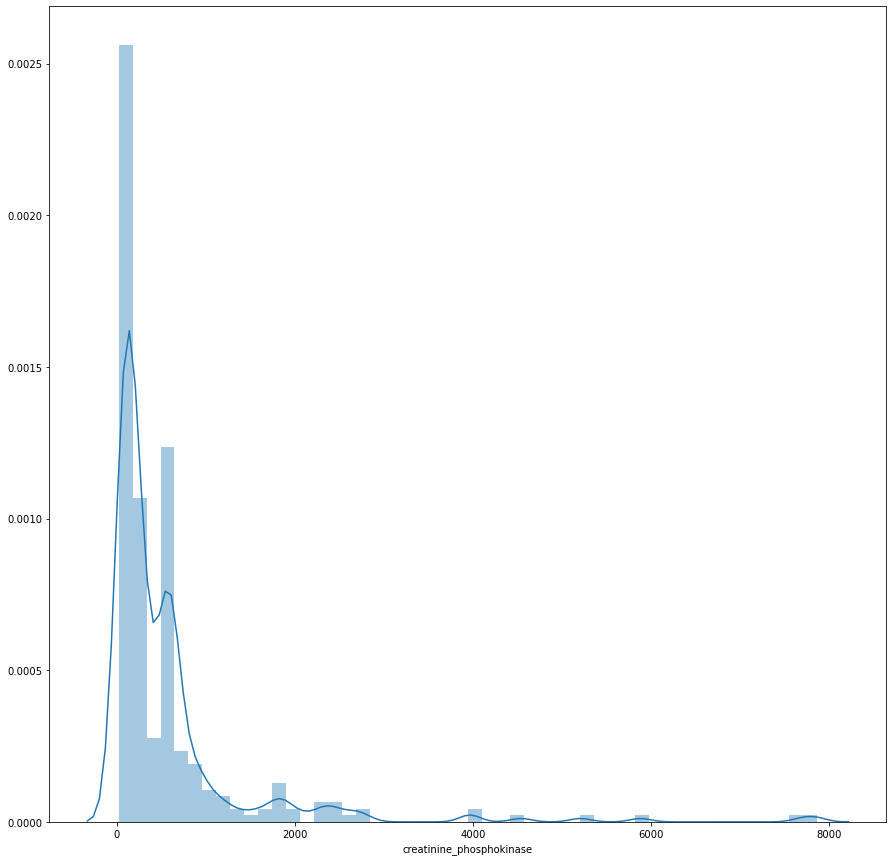

In [55]:
#creatinine_phosphokinase
plt.figure(figsize=(15,15))
sns.distplot(heart['creatinine_phosphokinase'])

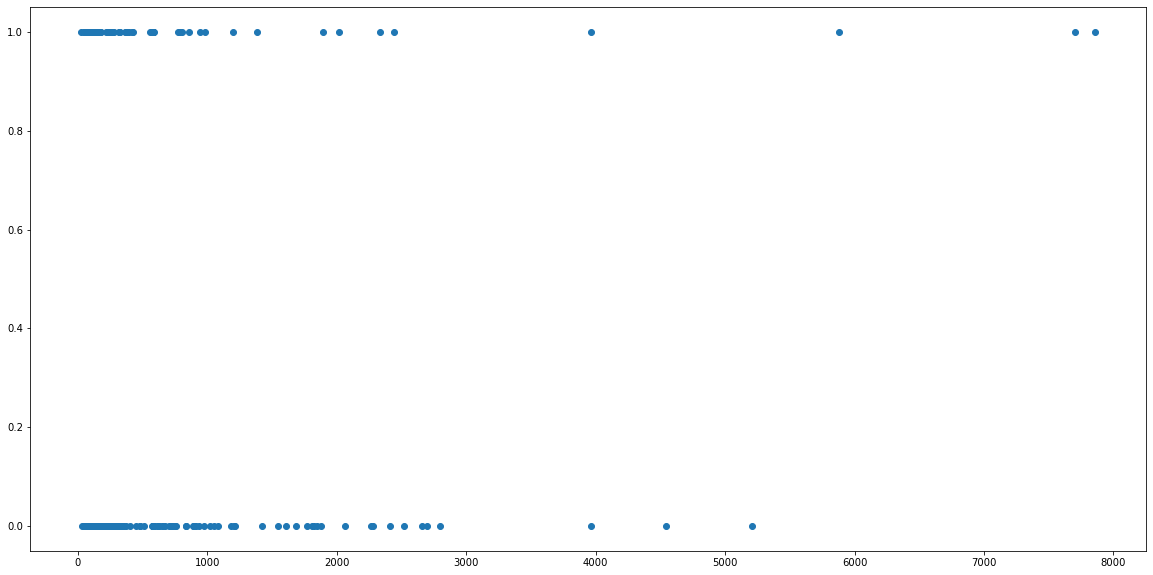

In [56]:
#We can also use scatter plot to check the distribution of creatinine_phosphokinase by group
plt.figure(figsize=(20,10))
plt.plot(heart.creatinine_phosphokinase,heart.DEATH_EVENT,'o')

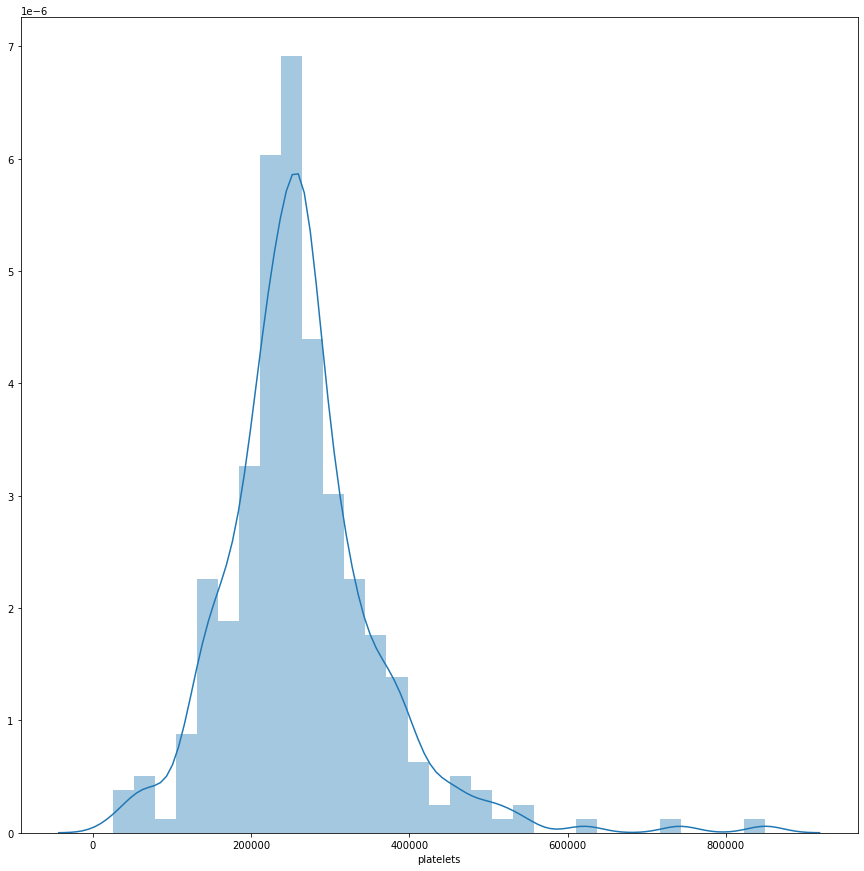

In [57]:
#platelets
plt.figure(figsize=(15,15))
sns.distplot(heart['platelets'])

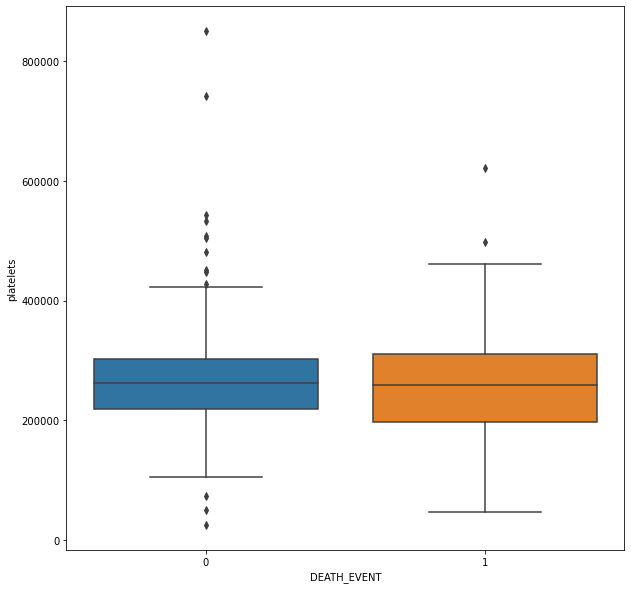

In [64]:
plt.figure(figsize=(10,10))
sns.boxplot(x = "DEATH_EVENT",y = "platelets",data=heart)

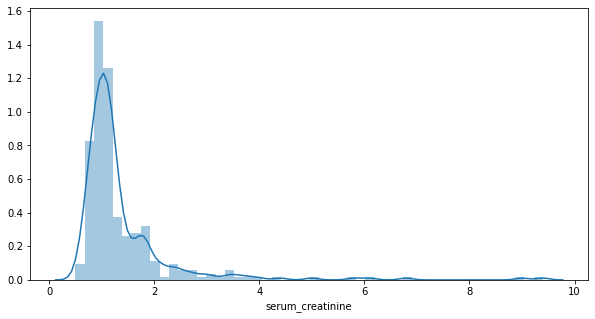

In [61]:
#serum_creatinine
plt.figure(figsize=(10,5))
sns.distplot(heart['serum_creatinine'])

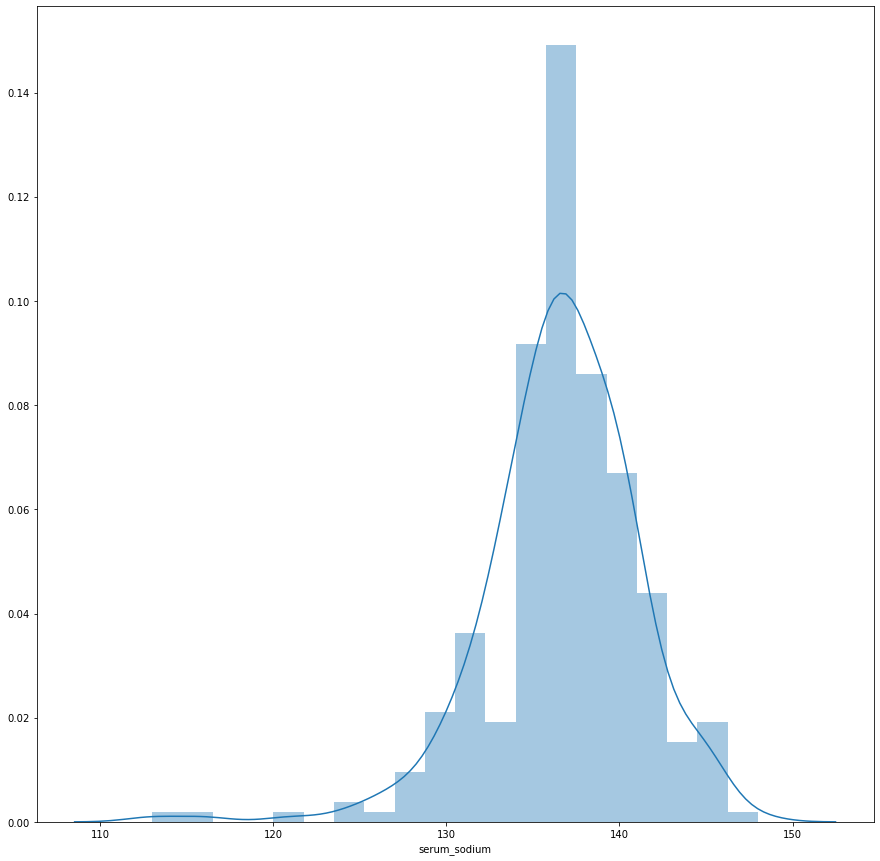

In [62]:
#serum_sodium
plt.figure(figsize=(15,15))
sns.distplot(heart['serum_sodium'])

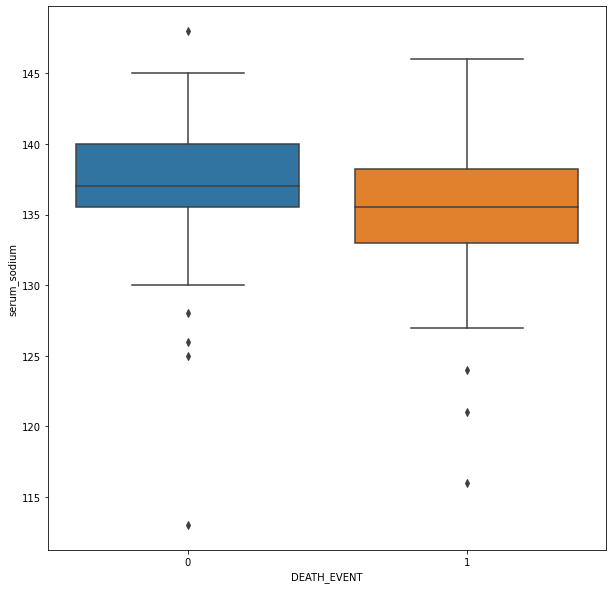

In [65]:
plt.figure(figsize=(10,10))
sns.boxplot(x = "DEATH_EVENT",y = "serum_sodium",data=heart)

The distribution of serum_sodium and platelets are possibly follow a normal distribution based on the samples. Also according to boxplot, the serum sodium level shows a slight difference between groups, but I won't explore this variable right now. 

Now I would like to apply some machine learning models to this dataset. Since we want to do a predictive model, all the independent variables need to be collected before the event happens. So we drop 'time' variable. I will use Logistic Regression, Random Forest and Neraul Network for the following sections.  

In [88]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [67]:
#remove 'time' variable
Xs = heart.drop(['time','DEATH_EVENT'],axis=1) 
Y = heart['DEATH_EVENT']

In [197]:
#Use 3/4 data as train dataset, 1/4 data as valid dataset
xTrain,xVald,yTrain,yVald = train_test_split(Xs,Y,train_size = 0.75,random_state = 4)

In [208]:
#Apply logistic regression model
log_score = []
for i in range(0,100,1):
    logmodel = LogisticRegression(penalty = 'l1',solver='liblinear',max_iter = 1000)
    logmodel.fit(xTrain,yTrain)
    log_predict = logmodel.predict(xVald)
    log_score.append(accuracy_score(yVald,log_predict))

In [211]:
print('The accuracy is: ',max(log_score))

The accuracy is:  0.76


In [204]:
#Apply random forests model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [212]:
#Decide the how many trees are efficient
max_rf_score = []
for i in range(100,600,100):
    rf_score = []
    for k in range(0,100,1):
        rfc = RandomForestClassifier(n_estimators=i,max_features="sqrt")
        rfc.fit(xTrain,yTrain)
        rfc_predict = rfc.predict(xVald)
        rf_score.append(accuracy_score(yVald,rfc_predict))
    max_rf_score.append(max(rf_score))

In [214]:
print(max_rf_score)

[0.7466666666666667, 0.7466666666666667, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333]


Based on the bootstrap result, we know that the prediction accuracy reaches highest when trees number is 100 and 200. The accuracy is 0.747.

So far we have achieved a 0.76 accuracy with logistic regression model. There could be some machine learning methods can reach higher accuracy than logistic regression model. However, that's not my points. There could be more criterias to evaluate the result, like recall for non-death group. We do not want to predict patient non-death, but in real life, the patient died. From this perspective, we need to connect our result to the real life experience.